In [25]:
import tensorflow as tf
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from sklearn.model_selection import train_test_split

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Enable deterministic operations (optional but helps on GPU)
tf.config.experimental.enable_op_determinism()

# Load the dataset
file_path = "TESLA.csv"  # Path to your dataset
data = pd.read_csv(file_path)

# Inspect the data
print(data.head())

# Extracting all feature columns for input (excluding 'Volume') 
features = data[['Open', 'High', 'Low', 'Close']].values

# Normalize the feature data
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

# Extracting the 'Close' price as the target variable (y)
target = data['Close'].values.reshape(-1, 1)
target_scaled = scaler.fit_transform(target)

# Create sequences for BiLSTM input using all features as X and 'Close' as y
def create_sequences(data, target, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])  # Use all features for X
        y.append(target[i + sequence_length])  # Only the 'Close' price for y
    return np.array(X), np.array(y)

sequence_length = 60  # Using 60 days of data to predict the next day
X, y = create_sequences(features_scaled, target_scaled, sequence_length)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the BiLSTM model
model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(LSTM(50)),
    Dropout(0.2),
    Dense(1)  # Output is a single value, the predicted 'Close' price
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Inverse transform the scaled predictions
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  # Inverse transform the actual test prices

         Date   Open   High    Low  Close  Adj Close    Volume
0  2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
1  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
3  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
4  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500
Epoch 1/20


2025-01-06 02:44:47.548638: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [1737,1]
	 [[{{node Placeholder/_11}}]]
2025-01-06 02:44:47.549077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [1737,1]
	 [[{{node Placeholder/_11}}]]
2025-01-06 02:44:47.807333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split

55/55 [==============================] - ETA: 0s - loss: 0.0052

2025-01-06 02:44:58.613703: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [579,1]
	 [[{{node Placeholder/_11}}]]
2025-01-06 02:44:58.614155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [579,1]
	 [[{{node Placeholder/_11}}]]
2025-01-06 02:44:58.830504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_d

55/55 [==============================] - 12s 103ms/step - loss: 0.0052 - val_loss: 0.0012
Epoch 2/20
55/55 [==============================] - 4s 72ms/step - loss: 0.0012 - val_loss: 6.1289e-04
Epoch 3/20
55/55 [==============================] - 4s 75ms/step - loss: 0.0010 - val_loss: 4.7924e-04
Epoch 4/20
55/55 [==============================] - 4s 81ms/step - loss: 7.1836e-04 - val_loss: 0.0018
Epoch 5/20
55/55 [==============================] - 5s 92ms/step - loss: 8.1076e-04 - val_loss: 7.9338e-04
Epoch 6/20
55/55 [==============================] - 4s 80ms/step - loss: 5.8061e-04 - val_loss: 3.7555e-04
Epoch 7/20
55/55 [==============================] - 4s 76ms/step - loss: 7.6172e-04 - val_loss: 3.2565e-04
Epoch 8/20
55/55 [==============================] - 4s 78ms/step - loss: 8.4468e-04 - val_loss: 4.2390e-04
Epoch 9/20
55/55 [==============================] - 4s 65ms/step - loss: 6.4057e-04 - val_loss: 5.2834e-04
Epoch 10/20
55/55 [==============================] - 4s 65ms/step 

2025-01-06 02:46:18.688659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [580,1]
	 [[{{node Placeholder/_11}}]]
2025-01-06 02:46:18.689010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [580,1]
	 [[{{node Placeholder/_11}}]]


19/19 [==============================] - 0s 15ms/step - loss: 3.0835e-04
Test Loss: 0.00030834783683530986


2025-01-06 02:46:19.037152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [580,60,4]
	 [[{{node Placeholder/_10}}]]
2025-01-06 02:46:19.037412: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [580,60,4]
	 [[{{node Placeholder/_10}}]]
2025-01-06 02:46:19.270730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/s

19/19 [==============================] - 1s 14ms/step


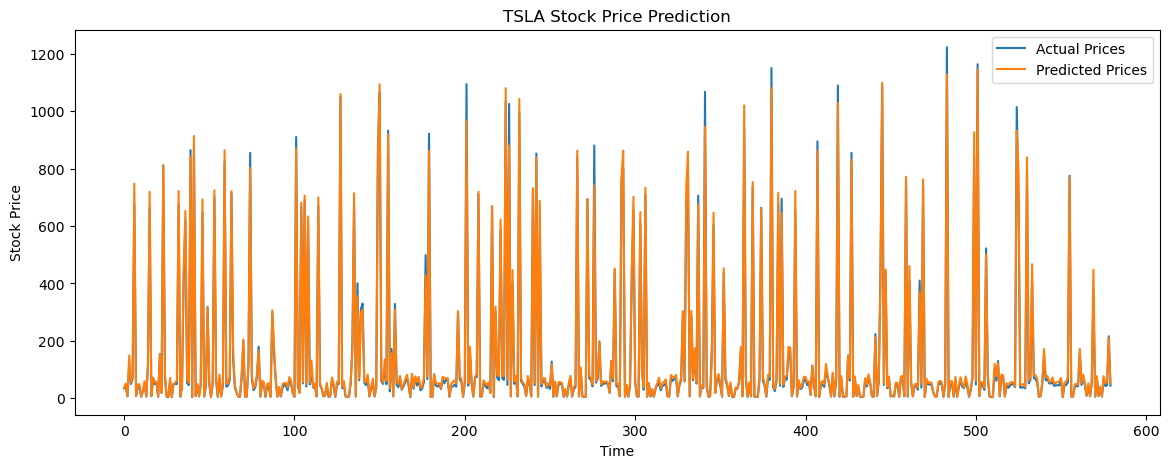

In [29]:
# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

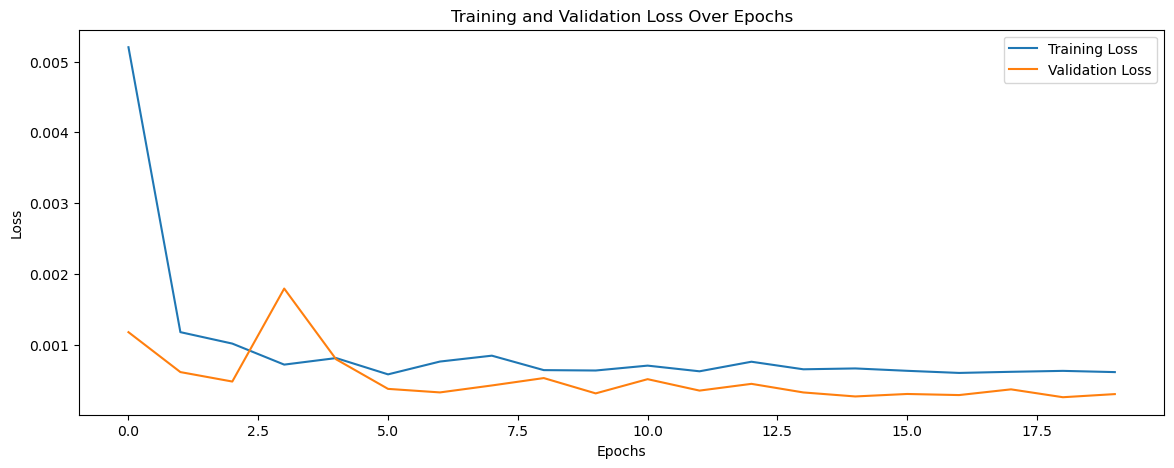

In [31]:
# Plot training and validation loss
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()